In [1]:
import csv 
import requests
import wikipediaapi
import classes as cs
import json
import networkx as nx
import graph_networkx as gnx
import nx_altair as nxa
import pandas as pd
import altair as alt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Testing file: so that I don't have to contstantly rerun

In [2]:
graph = gnx.createMyGraph()

#print(graph.nodes)
#returns info --  print(mygraph.nodes['Katy Perry'])


{'href': 'https://api.spotify.com/v1/playlists/1epzzJHOES6doiLf16R6Jw/tracks?offset=0&limit=100', 'items': [{'added_at': '2023-07-15T22:20:57Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/skyelermcquill'}, 'href': 'https://api.spotify.com/v1/users/skyelermcquill', 'id': 'skyelermcquill', 'type': 'user', 'uri': 'spotify:user:skyelermcquill'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7N15xabCPo5XjsUSTnGVes'}, 'href': 'https://api.spotify.com/v1/artists/7N15xabCPo5XjsUSTnGVes', 'id': '7N15xabCPo5XjsUSTnGVes', 'name': 'Lia Pappas-Kemps', 'type': 'artist', 'uri': 'spotify:artist:7N15xabCPo5XjsUSTnGVes'}], 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ'

In [3]:
print(graph.nodes['Jensen McRae'])

{'id': '11dABkjSoOjcP9p3TFSNRj', 'api_link': 'https://api.spotify.com/v1/artists/11dABkjSoOjcP9p3TFSNRj', 'genres': ['gen z singer-songwriter'], 'img_info': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebd4290c7602907221e584aa11', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174d4290c7602907221e584aa11', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178d4290c7602907221e584aa11', 'width': 160}], 'popularity': 42, 'birth': 'September 10, 1997 Santa Monica, California', 'died': 'alive', 'instruments': ['vocals,', 'piano,', 'guitar'], 'occupations': ['singer-songwriter,', 'poet'], 'type': 'artist'}


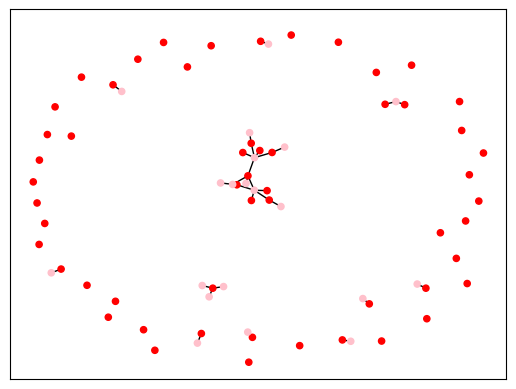

In [4]:

color_map = []
for node in graph:
    values = graph.nodes[node]
    if values['type'] == 'artist':
        color_map.append('red') #artist
    else: 
        color_map.append('pink') #genre

nx.draw_networkx(graph,with_labels=False,node_color=color_map,node_size=20) #.interactive()

In [54]:
for n in graph.nodes():
        graph.nodes[n]['id']=str(n)

def draw_network_old(graph):
        return(nxa.draw_networkx(graph).encode(tooltip=['id:N'],fill='type:N').properties(width=500,height=500,title='Top 100 Playlist Graph').interactive())


draw_network_old(graph)

alt.LayerChart(...)

In [61]:
def draw_network(graph,labels=True,size_v=300):        #labels is true or false
    position = nx.spring_layout(graph)

    nodelayer = nxa.draw_networkx_nodes(graph,pos=position)
    edgeslayer = nxa.draw_networkx_edges(graph,pos=position)
    n1=nodelayer.mark_circle(size=size_v,opacity=1).encode(color='type:N',tooltip=['id:N'])
    text = nodelayer.mark_text(color='black').encode(
        text='id:N'
        )
    if labels:
        return(edgeslayer+n1+text)
    return((edgeslayer+n1).interactive())
draw_network(graph,False,100).properties(width=500,height=500)

alt.LayerChart(...)

In [7]:
graph.nodes['melancholia']

{'type': 'genre', 'id': 'melancholia'}

In [6]:
nx.shortest_path(graph,source='uk pop',target='vancouver indie')

['uk pop',
 'Maisie Peters',
 'alt z',
 'chloe moriondo',
 'indie pop',
 'Haley Blais',
 'vancouver indie']

In [56]:
#here I want to get all artists & genres
def get_genre_artists(graph):
    '''
    Gets easy to parse lists of all the artists in a graph and all the genres.

    Returns the lists in a dict with keys 'artists' and 'genres'

    PARAMETERS
    ----------
    graph: networkx graph
        graph with nodes and edges, where every node has attributes id and type
    
    RETURNS
    -------
    dict: key string, value list
        dict with keys 'artists' & 'genres' with lists of all artists & genres respectively
    
    '''
    artist_list = []
    genre_list = []

    for n in graph.nodes():
        if graph.nodes[n]['type']=='artist':
            artist_list.append(n)
        elif graph.nodes[n]['type']=='genre':
            genre_list.append(n)
        else:
            print(n)
    return({'artists':artist_list,'genres':genre_list})

get_genre_artists(graph)

{'artists': ['Lia Pappas-Kemps',
  'Jensen McRae',
  'Maisie Peters',
  'WATERBEAR',
  'Celia',
  'Juliana Madrid',
  'Chloe Dadd',
  'Lauren Juzang',
  'ok.danke.tschüss',
  'Leanna Firestone',
  'Kayla Grace',
  'MELE',
  'The Beaches',
  'Blond',
  'Power Plush',
  'Dilla',
  'NoSo',
  'Chappell Roan',
  'Emei',
  'Moira & Claire',
  'SOMOH',
  'Casey Bishop',
  'Straats',
  'Ethan Hibbs',
  'Boyish',
  'Sydney Rose',
  'chloe moriondo',
  'Sophie Truax',
  'frown line',
  'Vines',
  'Ahli',
  'Caity Krone',
  'Amy Lawton',
  'Stevie Bill',
  'SKYLAR',
  'Eliza Harrison Smith',
  'Chase Petra',
  'EASHA',
  'Mel Bryant & the Mercy Makers',
  'Them Fantasies',
  'Babygirl',
  'milk.',
  'Annika Kilkenny',
  'Good Boy Daisy',
  'Haley Blais',
  'Willow Avalon',
  'Field Medic',
  'flor',
  'Alt Fiction',
  'Jesse Detor',
  'Blusher',
  'Evan Honer',
  'Blondshell',
  'Imani Graham',
  'chlothegod'],
 'genres': ['gen z singer-songwriter',
  'alt z',
  'uk pop',
  'toronto indie',
  'ge

In [62]:
#def filter_edge
def get_focus_graph(graph,name):
        neighbors = [n for n in graph.neighbors(name)]

        def filter_node(n1):
            if n1 ==name: 
                return True
            return (n1 in neighbors)
        
        sub_graph = nx.subgraph_view(graph,filter_node)
        return sub_graph


flor = get_focus_graph(graph,'flor')
draw_network(flor,labels=True,size_v=1000)

alt.LayerChart(...)

In [69]:
#nx.shortest_path(graph,source='Daft Punk',target='Daddy Yankee')
def get_shortest_graph(graph,name,end):
        try:
            neighbors = nx.shortest_path(graph,source=name,target=end) #THIS THROWS THE ERROR

            def filter_node(n1):
                if n1 ==name: 
                    return True
                return (n1 in neighbors)
            
            sub_graph = nx.subgraph_view(graph,filter_node)
            return(sub_graph)
        except:
            return None
        # position = nx.kamada_kawai_layout(sub_graph)

        # nodelayer = nxa.draw_networkx_nodes(sub_graph,pos=position)
        # edgeslayer = nxa.draw_networkx_edges(sub_graph,pos=position)
        # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
        # text = nodelayer.mark_text(color='black').encode(
        #     text='id'
        #     ).properties(title=f"From {name} to {end}")
        # return(edgeslayer+n1+text)

short = get_shortest_graph(graph,'uk pop','vancouver indie') 
draw_network(short,labels=True,size_v=1000)

alt.LayerChart(...)

In [ ]:
#print(graph.nodes['Daft Punk'])

In [74]:
def search_dead(graph): 
    def filter_node(n1):
            if graph.nodes[n1]['type']=='genre': #if its a genre its not dead
                return False
            elif graph.nodes[n1]['died']== None:
                 return False
            elif graph.nodes[n1]['died']=='alive':
                 return False
            return True
    sub_graph = nx.subgraph_view(graph,filter_node)

    nbrs = []

    for node in sub_graph:
        neighbors = [n for n in graph.neighbors(node)]
        nbrs += neighbors #could clean this up

    def filter_genres(n1):
        #similar helper function to one above, returns true or false if the node should be included
        #filters to include the nodes from sub_graph and their neighbors
        if n1 in list(sub_graph.nodes): 
            return True
        return (n1 in nbrs)

    return nx.subgraph_view(graph,filter_genres)


    # nodelayer = nxa.draw_networkx_nodes(and_genres,pos=position)
    # edgeslayer = nxa.draw_networkx_edges(and_genres,pos=position)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id:N' 
    #     ).properties(title=f"Dead artists")
    # return(n1+text) ###SKYELER MAKE A CHANGE-- IF NO NODES, RETURN NONE


dead=search_dead(graph)
draw_network(dead,labels=True,size_v=1000)

/Users/Skyeler/anaconda3/envs/si649f23/lib/python3.11/site-packages/altair/utils/core.py:228: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  warnings.warn(
/Users/Skyeler/anaconda3/envs/si649f23/lib/python3.11/site-packages/altair/utils/core.py:228: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  warnings.warn(
/Users/Skyeler/anaconda3/envs/si649f23/lib/python3.11/site-packages/altair/utils/core.py:228: UserWarning: I don't know how to infer vegalite type from 'empty'.  Defaulting to nominal.
  warnings.warn(


alt.LayerChart(...)

In [118]:
from networkx.readwrite import json_graph
#print(json_graph.node_link_data(graph))

thing = json_graph.node_link_data(graph)

#dumped_json_cache = json.dumps(cache_dict)
# fw = open('test_graph_data',"w")
# dumped_json_cache = json.dumps(thing)
# fw.write(dumped_json_cache)
# fw.close() 

def load_example_graph(filename='test_graph_data'):
    ex_file = open(filename,"r")
    graph_contents = ex_file.read()
    graph_dict = json.loads(graph_contents)
    ex_file.close()
    return nx.node_link_graph(graph_dict)

print(load_example_graph())


{'directed': False, 'multigraph': False, 'graph': {}, 'nodes': [{'api_link': 'https://api.spotify.com/v1/artists/7N15xabCPo5XjsUSTnGVes', 'genres': [], 'img_info': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebfae2e5d2180bebe2210df4aa', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174fae2e5d2180bebe2210df4aa', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178fae2e5d2180bebe2210df4aa', 'width': 160}], 'popularity': 22, 'birth': None, 'died': None, 'instruments': [], 'occupations': [], 'type': 'artist', 'id': 'Lia Pappas-Kemps'}, {'api_link': 'https://api.spotify.com/v1/artists/11dABkjSoOjcP9p3TFSNRj', 'genres': ['gen z singer-songwriter'], 'img_info': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5ebd4290c7602907221e584aa11', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174d4290c7602907221e584aa11', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/

In [81]:
def search_alive(graph): #MAYBE ADD LIVING AND DEAD GENRES TOOO???
    def filter_node(n1):
        if graph.nodes[n1]['type']=='genre': #if its a genre its not dead
            return False
        if graph.nodes[n1]['died'] is None:
             return False
        elif graph.nodes[n1]['died']=='alive':
                return True
        return False
    sub_graph= nx.subgraph_view(graph,filter_node)
    nbrs = []

    for node in sub_graph:
        neighbors = [n for n in graph.neighbors(node)]
        nbrs += neighbors #could clean this up

    def filter_genres(n1):
        #similar helper function to one above, returns true or false if the node should be included
        #filters to include the nodes from sub_graph and their neighbors
        if n1 in list(sub_graph.nodes): 
            return True
        return (n1 in nbrs)

    return nx.subgraph_view(graph,filter_genres)
    # position = nx.kamada_kawai_layout(sub_graph)

    # nodelayer = nxa.draw_networkx_nodes(sub_graph,pos=position)
    # #edgeslayer = nxa.draw_networkx_edges(sub_graph,pos=position)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N',tooltip=['id:N'])
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id'
    #     ).properties(title=f"Alive artists")
    # return(n1+text)

alive = search_alive(graph)
draw_network(alive,labels=True,size_v=200)

alt.LayerChart(...)

In [83]:
def search_from(graph,place): ###DOUBLES AS YEAR OF BIRTH

    def filter_node(n1):
        if graph.nodes[n1]['type']=='genre':
            return False
        if graph.nodes[n1]['birth']==None:
            return False
        elif place.lower() in graph.nodes[n1]['birth'].lower(): #if its a genre its not dead
            return True
        return False
    
    sub_graph = nx.subgraph_view(graph,filter_node)

    nbrs = []

    for node in sub_graph:
        nbrs += [n for n in graph.neighbors(node)]

    def filter_genres(n1):
        if n1 in list(sub_graph.nodes): 
            return True
        elif graph.nodes[n1]['type']!='genre':
            return False
        return (n1 in nbrs)
    

    return nx.subgraph_view(graph,filter_genres)


    # position = nx.kamada_kawai_layout(and_genres)
    # #SKYELER -- could onsider adding some cool cheeky tooltips

    # nodelayer = nxa.draw_networkx_nodes(and_genres,pos=position).properties(width=500,height=500)
    # edgeslayer = nxa.draw_networkx_edges(and_genres,pos=position).properties(width=500,height=500)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id:N'
    #     ).properties(title=f"Artists from {place}")
    # return(edgeslayer+n1+text)

england = search_from(graph,'England')
old = search_from(graph,'1997')
draw_network(old,labels=True,size_v=200)

alt.LayerChart(...)

In [86]:
def search_occupations(graph,job): 

    def filter_node(n1):
        if graph.nodes[n1]['type']=='genre':
            return False
        if graph.nodes[n1]['occupations']==None:
            return False
        elif job.lower() in graph.nodes[n1]['occupations']: #if its a genre its not dead
            return True
        return False
    
    sub_graph = nx.subgraph_view(graph,filter_node)

    nbrs = []

    for node in sub_graph:
        neighbors = [n for n in graph.neighbors(node)]
        nbrs += neighbors #could clean this up

    def filter_genres(n1):
        if n1 in list(sub_graph.nodes): 
            return True
        elif graph.nodes[n1]['type']!='genre':
            return False
        return (n1 in nbrs)
    
    

    return nx.subgraph_view(graph,filter_genres)


    # position = nx.kamada_kawai_layout(and_genres)

    # nodelayer = nxa.draw_networkx_nodes(and_genres,pos=position).properties(height=500,width=500)
    # edgeslayer = nxa.draw_networkx_edges(and_genres,pos=position).properties(height=500,width=500)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id:N'
    #     ).properties(title=f"Artists with a {job} career")
    # return(edgeslayer+n1+text)

poem_girls = search_occupations(graph,'poet')
draw_network(old,labels=True,size_v=200)

alt.LayerChart(...)

In [89]:
def search_instruments(graph,instru): 

    def filter_node(n1):
        if graph.nodes[n1]['type']=='genre':
            return False
        if graph.nodes[n1]['instruments']==None:
            return False
        elif instru.lower() in graph.nodes[n1]['instruments']: #if its a genre its not dead
            return True
        return False
    
    sub_graph = nx.subgraph_view(graph,filter_node)

    nbrs = []

    for node in sub_graph:
        neighbors = [n for n in graph.neighbors(node)]
        nbrs += neighbors #could clean this up

    def filter_genres(n1):
        if n1 in list(sub_graph.nodes): 
            return True
        elif graph.nodes[n1]['type']!='genre':
            return False
        return (n1 in nbrs)
    
    return nx.subgraph_view(graph,filter_genres)


    # position = nx.kamada_kawai_layout(and_genres)
    # #SKYELER -- could onsider adding some cool cheeky tooltips

    # nodelayer = nxa.draw_networkx_nodes(and_genres,pos=position)
    # edgeslayer = nxa.draw_networkx_edges(and_genres,pos=position)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id:N'
    #     ).properties(title=f"Who can play the {instru}?") ##Make this dynamic for vocals!
    return(edgeslayer+n1+text)

vocals = search_instruments(graph,'vocals')
draw_network(vocals,labels=True,size_v=200)

alt.LayerChart(...)

In [91]:
def calculate_avg_popularity(graph):
    count = 0
    sum = 0

    for n in graph.nodes:
        if graph.nodes[n]['type']!='genre':
            sum +=graph.nodes[n]['popularity']
            count+=1
    return (sum/count)

print(calculate_avg_popularity(graph))

33.92727272727273


In [96]:
def filter_popularity(graph,pop): #greater than

    def filter_node(n1):
        if graph.nodes[n1]['type']=='genre':
            return False
        if graph.nodes[n1]['popularity']==None:
            return False
        elif int(graph.nodes[n1]['popularity'])>=int(pop): #if its a genre its not dead
            return True
        return False
    
    sub_graph = nx.subgraph_view(graph,filter_node)

    nbrs = []

    for node in sub_graph:
        neighbors = [n for n in graph.neighbors(node)]
        nbrs += neighbors #could clean this up

    def filter_genres(n1):
        if n1 in list(sub_graph.nodes): 
            return True
        elif graph.nodes[n1]['type']!='genre':
            return False
        return (n1 in nbrs)
    

    return nx.subgraph_view(graph,filter_genres)


    # position = nx.kamada_kawai_layout(and_genres)

    # nodelayer = nxa.draw_networkx_nodes(and_genres,pos=position)
    # edgeslayer = nxa.draw_networkx_edges(and_genres,pos=position)
    # n1=nodelayer.mark_circle(size=1000,opacity=1).encode(color='type:N')
    # text = nodelayer.mark_text(color='black').encode(
    #     text='id:N'
    #     ).properties(title=f"Artists with a popularity score greater than {pop}") ##Make this dynamic for vocals!
    # return(edgeslayer+n1+text)

poppy = filter_popularity(graph,'50')
draw_network(poppy,labels=True,size_v=400)

alt.LayerChart(...)

In [106]:
#Let's get your genres 
def top_genres_bar(graph):
    genres = []

    for gnode in graph.nodes:
        if graph.nodes[gnode]['type']=='genre':
            genres.append([gnode,len([n for n in graph.neighbors(gnode)])])

    genre_popularity = pd.DataFrame(genres,columns = ['Genres',"Count of Artists"])
    #genre_popularity

    return alt.Chart(genre_popularity).mark_bar().encode(
        x=alt.X('Count of Artists:Q'),
        y=alt.Y('Genres:N',
                sort='-x')).transform_window(
        rank='rank(Neighbors)',
        #sort=[alt.SortField('Neighbors', order='descending')]
    ).transform_filter(
        (alt.datum.rank < 10)
    ).properties(
        title='Your top genres'
    )

top_genres_bar(graph)

alt.Chart(...)